(19, 4)
[1 7 7 4 7 1 3 2 3 3 5 7 6 4 3 2 5 6 6 6]
columns
['chr_index', 'start', 'cell_id', 'bhc_cluster_id', 'sample_id']
levels
['cell_id', 'bhc_cluster_id', 'sample_id']
first_sample_ids:
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
sample_ids [1 1 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 1 1 2]


/Users/massoudmaher/Documents/Code/scgenome/scgenome/cnplot.py:50: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(D, method='complete')


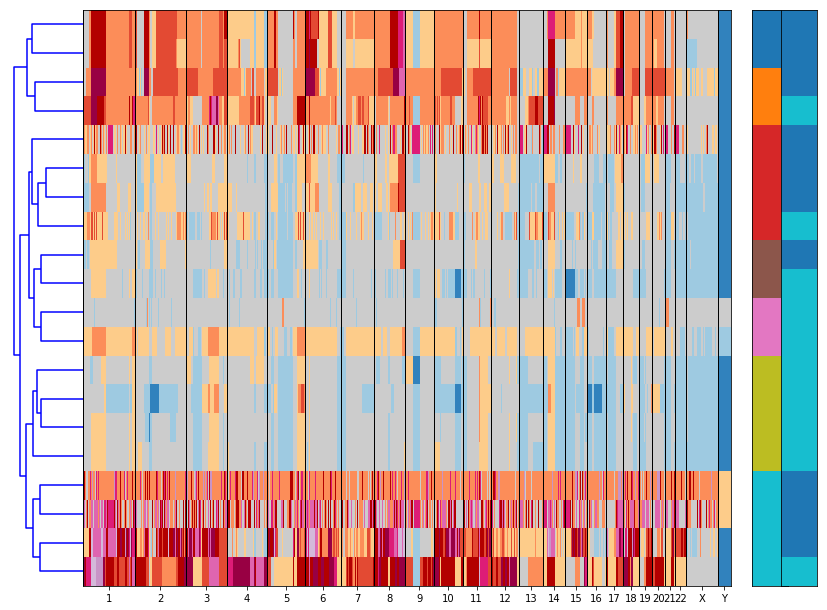

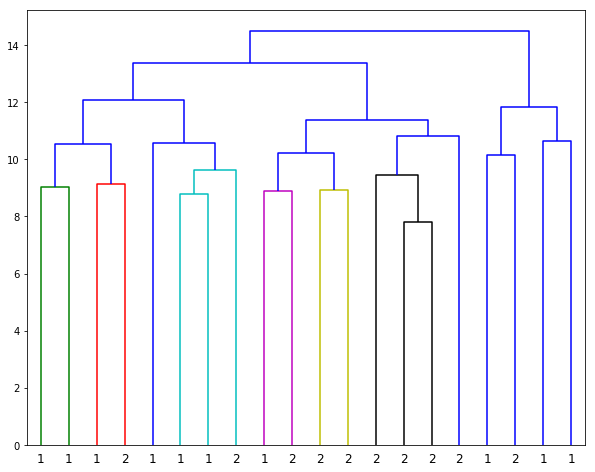

In [8]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster, dendrogram
import scgenome.cncluster
import scgenome.cnplot
import pandas as pd
import numpy as np

biplot_data = pd.read_csv("~/data/biplot_data.csv").to_numpy()[:, 1:]
print(biplot_data.shape)
bi_cn_data = pd.read_csv("~/data/bi_cn_data.csv")
bi_cn_ids = np.array([
    'cl1_SA921-A90554A-R05-C57', 'cl1_SA921-A90554A-R08-C54',
    'cl1_SA921-A90554A-R08-C55', 'cl1_SA921-A90554A-R08-C56',
    'cl1_SA921-A90554A-R08-C57', 'cl1_SA921-A90554A-R11-C16',
    'cl1_SA921-A90554A-R12-C03', 'cl1_SA921-A90554A-R12-C05',
    'cl1_SA921-A90554A-R12-C07', 'cl1_SA921-A90554A-R12-C09',
    'cl2_SA1090-A96213A-R22-C06', 'cl2_SA1090-A96213A-R28-C12',
    'cl2_SA1090-A96213A-R28-C13', 'cl2_SA1090-A96213A-R28-C18',
    'cl2_SA1090-A96213A-R28-C19', 'cl2_SA1090-A96213A-R32-C60',
    'cl2_SA1090-A96213A-R34-C60', 'cl2_SA1090-A96213A-R34-C62',
    'cl2_SA1090-A96213A-R34-C63', 'cl2_SA1090-A96213A-R34-C64'])

biplot_data[:, 2] = np.log(biplot_data[:, 2])
bifclustering = fcluster(biplot_data, 1.15)
print(bifclustering)
# TODO this breaks when theres only 1 cluster
bi_cn_data = scgenome.cncluster.prune_cluster(bifclustering, bi_cn_ids, 
                                              bi_cn_data)
bi_cn_data["sample_id"] = bi_cn_data["cell_id"].str[2].astype("int")

fig = plt.figure(figsize=(10, 8))
bimatrix_data = scgenome.cnplot.plot_clustered_cell_cn_matrix_figure(
    fig, bi_cn_data, "state", cluster_field_name="bhc_cluster_id",
    linkage=biplot_data, 
    origin_field_name="sample_id")

fig = plt.figure(figsize=(10, 8))
f = dendrogram(biplot_data, 
               #labels=bifclustering)
               labels=list(pd.Series(bi_cn_ids).str[2]))

